In [12]:
from bs4 import BeautifulSoup
import requests

import numpy as np
import matplotlib.pyplot as plt
def calc_momentum(k_period,d=0.9):
        n = len(k_period)
        if n==0:
            return 0
        if n>10:
            k_period = k_period[-10:]
        n = len(k_period)
        init = k_period[0]
        flag = int(init)
        momentum = 0
        streak = 1
        for i in range(1,n):
            cur = k_period[i]
            flag_cur = int(cur)
            if flag_cur==0 and flag==1:
                momentum*=d
                momentum+=streak*d
                flag = flag_cur
                streak = 1
            elif flag_cur==1 and flag==0:
                momentum*=d
                momentum+= -streak*d
                flag = flag_cur
                streak = 1
            else:
                flag = flag_cur
                streak +=1
        if flag==1:
            momentum+=streak
        else:
            momentum-=streak
        return momentum
#example input

In [42]:
TeamFull = ['San Antonio Spurs', 'Golden State Warriors', 'Oklahoma City Thunder', 'Cleveland Cavaliers', 'Toronto Raptors', 'Los Angeles Clippers', 'Atlanta Hawks', 'Boston Celtics', 'Charlotte Hornets', 'Utah Jazz', 'Indiana Pacers', 'Miami Heat', 'Portland Trail Blazers', 'Detroit Pistons', 'Houston Rockets', 'Dallas Mavericks', 'Washington Wizards', 'Chicago Bulls', 'Orlando Magic', 'Memphis Grizzlies', 'Sacramento Kings', 'Denver Nuggets', 'New York Knicks', 'New Orleans Pelicans', 'Minnesota Timberwolves', 'Milwaukee Bucks', 'Phoenix Suns', 'Brooklyn Nets', 'Los Angeles Lakers', 'Philadelphia 76ers']
Teams = ['SAS','GSW','OKC','CLE','TOR','LAC','ATL','BOS','CHO','UTA','IND','MIA','POR','DET','HOU','DAL','WAS','CHI','ORL','MEM','SAC','DEN','NYK','NOP','MIN','MIL','PHO','BRK','LAL','PHI']
#regular season data scraping



In [51]:
season_input = 2018
X = []
y=[]
z=[]
for season_train in [2015,2016,2017]:
#season_train = season_input - 1
#database
    advanced_train = 'http://www.basketball-reference.com/leagues/NBA_'+str(season_train)+'_advanced.html'

    req = requests.get(advanced_train) 

    text = BeautifulSoup(req.text, 'html.parser')
    stats = text.find('div',{'id': 'all_advanced_stats'}) 
    cols = [i.get_text() for i in stats.thead.find_all('th')] 

    # convert from unicode to string 
    cols = [x.encode('UTF8') for x in cols] 
    #print cols
    # get rows 
    rows=[]
    for i in stats.tbody.find_all('tr'):
        cols = [j.get_text() for j in i.find_all('td')] 

        row_i = [x.encode('UTF8') for x in cols]

        rows.append(row_i)


    PERAvg = np.zeros(30)
    GP = np.zeros(30)
    Min = np.zeros(30)

    for row in rows:
        if len(row)==0:
            continue
        if row[3]!='TOT':
            team = row[3]
            mins = row[5]
            gp = row[4]
            index = Teams.index(team)
            if float(mins)/float(gp) > 8.0:
                GP[index] += int(gp)
                Min[index] += int(mins)
                PERAvg[index] += float(row[6]) * int(mins)
    PERAvg /= Min
    ############
    Boxscore = []
    X_team = []#guestteam,hometeam
    Team_Res = {}
    
    for month in ["october","november","december","january","february","march","april"]:
        boxscore = "http://www.basketball-reference.com/leagues/NBA_"+str(season_train)+"_games-"+str(month)+".html"
        req = requests.get(boxscore) 

        text = BeautifulSoup(req.text, 'html.parser')
        stats = text.find('div',{'id': 'all_schedule'}) 
        cols = [i.get_text() for i in stats.thead.find_all('th')] 

        # convert from unicode to string 
        cols = [x.encode('UTF8') for x in cols] 
        #print cols
        # get rows 

        for i in stats.tbody.find_all('tr'):
            cols = [j.get_text() for j in i.find_all('td')] 

            row_i = [x.encode('UTF8') for x in cols]
            if row_i:
                if row_i[2]:
                    Boxscore.append([int(row_i[2]),int(row_i[4])])
                    home_win = int(int(row_i[4])>int(row_i[2]))
                    guest_win = abs(1-home_win)
                    X_team.append([row_i[1],row_i[3]])
                    home_m = 0
                    guest_m = 0
                    if row_i[1] not in Team_Res:
                        Team_Res.update({row_i[1]:[guest_win]})
                    else:
                        hist = Team_Res[row_i[1]]
                        guest_m = calc_momentum(hist)
                        Team_Res[row_i[1]].append(guest_win)
                    if row_i[3] not in Team_Res:
                        Team_Res.update({row_i[3]:[home_win]})
                    else:
                        hist = Team_Res[row_i[3]]
                        home_m = calc_momentum(hist)
                        Team_Res[row_i[3]].append(home_win)
                    index_guest = TeamFull.index(row_i[1])
                    index_home = TeamFull.index(row_i[3])
                    X.append([PERAvg[index_guest],PERAvg[index_home],guest_m,home_m])
                    y.append(int(row_i[4])-int(row_i[2]))
                    z.append(home_win)#hometeam win
X = np.array(X).reshape((len(X),4))
y = np.array(y).reshape((len(X),1))
z = np.array(z).reshape((len(X),1))
#######
#new inquiry


In [70]:
#new inquiry
advanced_test = 'http://www.basketball-reference.com/leagues/NBA_'+str(season_input)+'_advanced.html'

req = requests.get(advanced_test) 

text = BeautifulSoup(req.text, 'html.parser')
stats = text.find('div',{'id': 'all_advanced_stats'}) 
cols = [i.get_text() for i in stats.thead.find_all('th')] 

# convert from unicode to string 
cols = [x.encode('UTF8') for x in cols] 
#print cols
# get rows 
rows=[]
for i in stats.tbody.find_all('tr'):
    cols = [j.get_text() for j in i.find_all('td')] 
    
    row_i = [x.encode('UTF8') for x in cols]
    
    rows.append(row_i)


PERAvg_test = np.zeros(30)
GP = np.zeros(30)
Min = np.zeros(30)

for row in rows:
    if len(row)==0:
        continue
    if row[3]!='TOT':
        team = row[3]
        mins = row[5]
        gp = row[4]
        index = Teams.index(team)
        if float(mins)/float(gp) > 8.0:
            GP[index] += int(gp)
            Min[index] += int(mins)
            PERAvg_test[index] += float(row[6]) * int(mins)
PERAvg_test /= Min
############

#####
from sklearn.linear_model import LinearRegression,HuberRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
#game margin

#regr = LinearRegression()
regr = HuberRegressor(alpha=0)
kf = KFold(len(y),n_folds=5,shuffle=True)
#pred=[]
#test case
x_team = ['ATL','BOS']        
index_0 = Teams.index(x_team[0])
index_1 = Teams.index(x_team[1])
home_m = calc_momentum(get_team_record(x_team[1],season_input))
guest_m = calc_momentum(get_team_record(x_team[0],season_input))
x = np.array([PERAvg_test[index_0],PERAvg_test[index_1],guest_m,home_m]).reshape(1,-1)            
# Iterate through folds
print "5-fold R^2_test (game margin):"
coef = []
predict = 0
max_score = 0
for train_index, test_index in kf:
        X_train,X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        regr.fit(X_train,y_train)
        #pred.append(regr.predict(x)[0][0])
        r2 = regr.score(X_test,y_test)
        if r2>max_score:
            max_score = r2
            
        ##############predict
regr.fit(X,y)

predict = regr.predict(x)[0]
coef,intercept = regr.coef_,regr.intercept_
#predicted = sum(pred)/len(pred)



print "Home:"+x_team[1]+" vs "+"Guest:"+x_team[0]
print max_score
print coef,intercept
print "Hometeam game margin:"+str(predict)
#game winner
regr = LogisticRegression()
kf = KFold(len(z),n_folds=5,shuffle=True)
pred=[]
       
index_0 = Teams.index(x_team[0])
index_1 = Teams.index(x_team[1])
home_m = calc_momentum(get_team_record(x_team[1],season_input))
guest_m = calc_momentum(get_team_record(x_team[0],season_input))
x = np.array([PERAvg_test[index_0],PERAvg_test[index_1],guest_m,home_m]).reshape(1,-1)      
       
# Iterate through folds
def model(x):
    return 1 / (1 + np.exp(-x))
print "5-fold R^2_test (game winner):"
max_score = 0
coeff = []
intercept = 0
pred = 0
for train_index, test_index in kf:

        X_train, X_test = X[train_index], X[test_index]
        z_train, z_test = z[train_index], z[test_index]

        regr.fit(X_train,z_train)
        coef = regr.coef_[0]
        #print coef
        intercept = regr.intercept_[0]
        #print intercept
        
        r2 = regr.score(X_test,z_test)
       
        if r2>max_score:
            max_score = r2
            
        ##############predict
regr.fit(X,z)

coeff,intercept = regr.coef_[0],regr.intercept_[0]
prob = model(x[0][0] * coeff[0] + x[0][1]*coeff[1]+x[0][2]*coeff[2]+x[0][3]*coeff[3]+intercept)
print max_score
print coeff,intercept
print "homwteam win prob:"+str(prob)

5-fold R^2_test (game margin):
Home:BOS vs Guest:ATL
0.216555104886
[-3.44642028  3.81685163 -0.16053294  0.23453748] -2.86179695417
Hometeam game margin:6.62749007627
5-fold R^2_test (game winner):
0.688481675393
[-0.51805045  0.57991114 -0.03056673  0.04023239] -0.532167425084
homwteam win prob:0.737248953451


In [65]:
def get_team_record(team,season):
    team_schedule = 'https://www.basketball-reference.com/teams/'+team+'/'+str(season)+'_games.html'
    req = requests.get(team_schedule) 
    text = BeautifulSoup(req.text, 'html.parser')
    stats = text.find('div',{'id': 'all_games'}) 
    cols = [i.get_text() for i in stats.thead.find_all('th')] 

        # convert from unicode to string 
    cols = [x.encode('UTF8') for x in cols] 
    #print cols
    records = []
    for i in stats.tbody.find_all('tr'):
            cols = [j.get_text() for j in i.find_all('td')] 
            row_i = [x.encode('UTF8') for x in cols]
            #store results in the records matrix
            if len(row_i)==14 and row_i[6]:
                
                result = int(row_i[6]=='W')
               
                records.append(result)
    return records


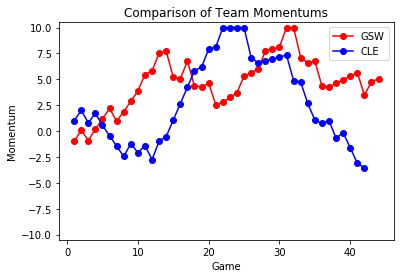

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt, mpld3
home_team,guest_team = 'GSW','CLE'
bos_rec = get_team_record(home_team,2018)
cav_rec = get_team_record(guest_team,2018)
bos_m = []
cav_m = []
for i in range(1,len(bos_rec)+1):
    cur = bos_rec[0:i]
    cur_m = calc_momentum(cur)
    bos_m.append(cur_m)
for i in range(1,len(cav_rec)+1):
    cur = cav_rec[0:i]
    cur_m = calc_momentum(cur)
    cav_m.append(cur_m)
fig = plt.figure()
plt.plot(range(1,len(bos_rec)+1),bos_m,'ro-',label=home_team)
plt.plot(range(1,len(cav_rec)+1),cav_m,'bo-',label=guest_team)
plt.legend()
plt.xlabel('Game')
plt.ylabel('Momentum')
plt.ylim((-10.5,10.5))
plt.title('Comparison of Team Momentums')

In [83]:
mpld3.fig_to_html(fig)